## Import libraries

In [1]:
import gc
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import StratifiedKFold

## Prepare data

In [2]:
with open("../input/mathcothon-i-shalt-prepareth-data/MathCoThon_Ready_Meatballs.txt", 'rb') as handle: 
    data = handle.read()

processed_data = pickle.loads(data)
train_df = processed_data['train_df']

Ytrain_meta = train_df['Price'].values
Ytrain_strat = pd.qcut(np.log1p(train_df['Price']), q=10, labels=range(0,10))

del processed_data
gc.collect()

13

In [3]:
ds = np.load('../input/mathcothon-traineth-lightgbm/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb1, oof_score_lgb1, y_pred_final_lgb1 = ds['y_pred_meta_lgb1'], ds['oof_score1'], ds['y_pred_final_lgb1']
y_pred_meta_lgb2, oof_score_lgb2, y_pred_final_lgb2 = ds['y_pred_meta_lgb2'], ds['oof_score2'], ds['y_pred_final_lgb2']

ds = np.load('../input/mathcothon-traineth-lightgbm-v2/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb3, oof_score_lgb3, y_pred_final_lgb3 = ds['y_pred_meta_lgb1'], ds['oof_score1'], ds['y_pred_final_lgb1']
y_pred_meta_lgb4, oof_score_lgb4, y_pred_final_lgb4 = ds['y_pred_meta_lgb2'], ds['oof_score2'], ds['y_pred_final_lgb2']

ds = np.load('../input/mathcothon-traineth-lightgbm-v3/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb5, oof_score_lgb5, y_pred_final_lgb5 = ds['y_pred_meta_lgb1'], ds['oof_score1'], ds['y_pred_final_lgb1']
y_pred_meta_lgb6, oof_score_lgb6, y_pred_final_lgb6 = ds['y_pred_meta_lgb2'], ds['oof_score2'], ds['y_pred_final_lgb2']

ds = np.load('../input/mathcothon-traineth-lightgbm-v4/LGB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_lgb7, oof_score_lgb7, y_pred_final_lgb7 = ds['y_pred_meta_lgb1'], ds['oof_score1'], ds['y_pred_final_lgb1']
y_pred_meta_lgb8, oof_score_lgb8, y_pred_final_lgb8 = ds['y_pred_meta_lgb2'], ds['oof_score2'], ds['y_pred_final_lgb2']

ds = np.load('../input/mathcothon-traineth-catboost/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb1, oof_score_cb1, y_pred_final_cb1 = ds['y_pred_meta_cb1'], ds['oof_score1'], ds['y_pred_final_cb1']
y_pred_meta_cb2, oof_score_cb2, y_pred_final_cb2 = ds['y_pred_meta_cb2'], ds['oof_score2'], ds['y_pred_final_cb2']

ds = np.load('../input/mathcothon-traineth-catboost-v2/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb3, oof_score_cb3, y_pred_final_cb3 = ds['y_pred_meta_cb1'], ds['oof_score1'], ds['y_pred_final_cb1']
y_pred_meta_cb4, oof_score_cb4, y_pred_final_cb4 = ds['y_pred_meta_cb2'], ds['oof_score2'], ds['y_pred_final_cb2']

ds = np.load('../input/mathcothon-traineth-catboost-v3/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb5, oof_score_cb5, y_pred_final_cb5 = ds['y_pred_meta_cb1'], ds['oof_score1'], ds['y_pred_final_cb1']
y_pred_meta_cb6, oof_score_cb6, y_pred_final_cb6 = ds['y_pred_meta_cb2'], ds['oof_score2'], ds['y_pred_final_cb2']

ds = np.load('../input/mathcothon-traineth-catboost-v4/CB_Meta_Features.npz', allow_pickle=True)
y_pred_meta_cb7, oof_score_cb7, y_pred_final_cb7 = ds['y_pred_meta_cb1'], ds['oof_score1'], ds['y_pred_final_cb1']
y_pred_meta_cb8, oof_score_cb8, y_pred_final_cb8 = ds['y_pred_meta_cb2'], ds['oof_score2'], ds['y_pred_final_cb2']

## Base Models Performance

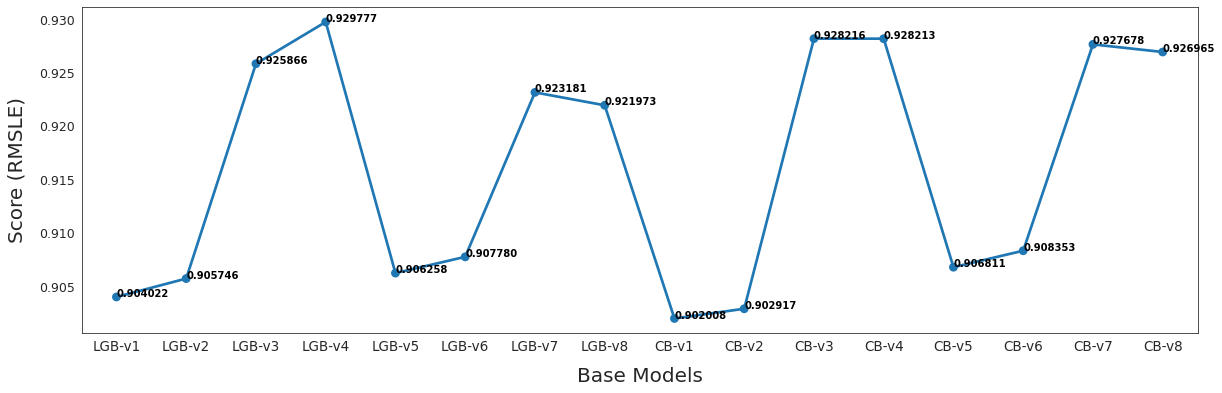

In [4]:
scores={
    'LGB-v1': float(oof_score_lgb1),
    'LGB-v2': float(oof_score_lgb2),
    'LGB-v3': float(oof_score_lgb3),
    'LGB-v4': float(oof_score_lgb4),
    'LGB-v5': float(oof_score_lgb5),
    'LGB-v6': float(oof_score_lgb6),
    'LGB-v7': float(oof_score_lgb7),
    'LGB-v8': float(oof_score_lgb8),
    'CB-v1': float(oof_score_cb1),
    'CB-v2': float(oof_score_cb2),
    'CB-v3': float(oof_score_cb3),
    'CB-v4': float(oof_score_cb4),
    'CB-v5': float(oof_score_cb5),
    'CB-v6': float(oof_score_cb6),
    'CB-v7': float(oof_score_cb7),
    'CB-v8': float(oof_score_cb8)
}

sns.set_style("white")
fig = plt.figure(figsize=(20, 6))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score in list(scores.values())], markers=['o'], linestyles=['-'])
for i, score in enumerate(list(scores.values())):
    ax.text(i, score, '{:.6f}'.format(score), horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('Score (RMSLE)', size=20, labelpad=12.5)
plt.xlabel('Base Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.show()

## Weighted Average Submission

In [5]:
y_pred_final_lgb = (((y_pred_final_lgb1 + y_pred_final_lgb2 + y_pred_final_lgb5 + y_pred_final_lgb6)/4.0)*0.7) + \
                   (((y_pred_final_lgb3 + y_pred_final_lgb4 + y_pred_final_lgb7 + y_pred_final_lgb8)/4.0)*0.3)

y_pred_final_cb = (((y_pred_final_cb1 + y_pred_final_cb2 + y_pred_final_cb5 + y_pred_final_cb6)/4.0)*0.7) + \
                  (((y_pred_final_cb3 + y_pred_final_cb4 + y_pred_final_cb7 + y_pred_final_cb8)/4.0)*0.3)

y_pred_final = (y_pred_final_lgb * 0.5) + (y_pred_final_cb * 0.5)

In [6]:
train_df = pd.read_csv("../input/mathcothon/train.csv")
test_df = pd.read_csv("../input/mathcothon/test.csv")

check_cols = [col for col in train_df.columns if col != 'ID']
train_df = train_df[~train_df.duplicated(subset=check_cols, keep='first')].copy()
print(f"Num records after Step-1: {train_df.shape[0]}")

check_cols = [col for col in train_df.columns if col not in ['ID','Price']]
train_df = train_df.groupby(check_cols).agg({'Price':'median'}).reset_index().copy()
print(f"Num records after Step-2: {train_df.shape[0]}")

Num records after Step-1: 15725
Num records after Step-2: 15463


In [7]:
train_cols = [col for col in train_df.columns if col != 'ID']
test_cols = [col for col in test_df.columns if col not in ['ID','Price']]

df = pd.merge(
    test_df[test_cols], 
    train_df[train_cols], 
    how='left', 
    on=test_cols,
    sort=False
)

df = df.rename(columns={'Price': 'Train_Price'})
df['Predicted_Price'] = np.exp(y_pred_final.ravel())
df['Price'] = df.apply(lambda row: row['Predicted_Price'] if pd.isnull(row['Train_Price']) else row['Train_Price'], axis=1)
print(f"df: {df.shape}")
df.head()

df: (8245, 19)


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Train_Price,Predicted_Price,Price
0,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,10591.293689,10591.293689
1,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,9651.961636,9651.961636
2,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,8289.132249,8289.132249
3,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,5897.242535,5897.242535
4,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,3537.993287,3537.993287


In [8]:
df.loc[df['Manufacturer']=='TESLA','Price'] = 53941
df.loc[df['Manufacturer']=='SATURN','Price'] = 13799
df.loc[df['Manufacturer']=='ASTON MARTIN','Price'] = 54000
df.loc[(df['Manufacturer']=='GREATWALL')&(df['Model']=='C30'),'Price'] = 10036

df.loc[df['Prod. year']==1943,'Price'] = 119172
df.loc[df['Prod. year']==1968,'Price'] = 2200
df.loc[df['Prod. year']==1981,'Price'] = 2800

df.loc[df['Fuel type']=='Hydrogen','Price'] = 20385

df.loc[df['Engine volume']=='0.3 Turbo', 'Price'] = 6272
df.loc[df['Engine volume']=='0.5', 'Price'] = 1300
df.loc[df['Engine volume']=='0.8 Turbo', 'Price'] = 6272
df.loc[df['Engine volume']=='3.1', 'Price'] = 8781
df.loc[df['Engine volume']=='5.2', 'Price'] = 13000
df.loc[df['Engine volume']=='6.7', 'Price'] = 1019

In [9]:
submit_df = pd.DataFrame()
submit_df['Price'] = df['Price']
submit_df.to_csv("./Margarita_Submission.csv", index=False)
submit_df.head()

,Price
0,10591.293689
1,9651.961636
2,8289.132249
3,5897.242535
4,3537.993287


## Models Blend

### Prepare data

In [10]:
y_pred_final_cb1 = np.array([y_pred_final_cb1]).T
y_pred_final_cb2 = np.array([y_pred_final_cb2]).T
y_pred_final_cb3 = np.array([y_pred_final_cb3]).T
y_pred_final_cb4 = np.array([y_pred_final_cb4]).T
y_pred_final_cb5 = np.array([y_pred_final_cb5]).T
y_pred_final_cb6 = np.array([y_pred_final_cb6]).T
y_pred_final_cb7 = np.array([y_pred_final_cb7]).T
y_pred_final_cb8 = np.array([y_pred_final_cb8]).T

y_pred_final_lgb1 = np.array([y_pred_final_lgb1]).T
y_pred_final_lgb2 = np.array([y_pred_final_lgb2]).T
y_pred_final_lgb3 = np.array([y_pred_final_lgb3]).T
y_pred_final_lgb4 = np.array([y_pred_final_lgb4]).T
y_pred_final_lgb5 = np.array([y_pred_final_lgb5]).T
y_pred_final_lgb6 = np.array([y_pred_final_lgb6]).T
y_pred_final_lgb7 = np.array([y_pred_final_lgb7]).T
y_pred_final_lgb8 = np.array([y_pred_final_lgb8]).T

In [11]:
Xtrain_meta = np.concatenate((y_pred_meta_cb1, y_pred_meta_lgb1,  
                              y_pred_meta_cb2, y_pred_meta_lgb2,
                              y_pred_meta_cb3, y_pred_meta_lgb3,
                              y_pred_meta_cb4, y_pred_meta_lgb4,
                              y_pred_meta_cb5, y_pred_meta_lgb5,
                              y_pred_meta_cb6, y_pred_meta_lgb6,
                              y_pred_meta_cb7, y_pred_meta_lgb7,
                              y_pred_meta_cb8, y_pred_meta_lgb8), axis=1)

Xpredict_meta = np.concatenate((y_pred_final_cb1, y_pred_final_lgb1, 
                                y_pred_final_cb2, y_pred_final_lgb2,
                                y_pred_final_cb3, y_pred_final_lgb3,
                                y_pred_final_cb4, y_pred_final_lgb4,
                                y_pred_final_cb5, y_pred_final_lgb5,
                                y_pred_final_cb6, y_pred_final_lgb6,
                                y_pred_final_cb7, y_pred_final_lgb7,
                                y_pred_final_cb8, y_pred_final_lgb8), axis=1)

print("Xtrain_meta shape: {}".format(Xtrain_meta.shape))
print("Ytrain_meta shape: {}".format(Ytrain_meta.shape))
print("Xpredict_meta shape: {}".format(Xpredict_meta.shape))

Xtrain_meta shape: (15628, 16)
Ytrain_meta shape: (15628,)
Xpredict_meta shape: (8245, 16)


In [12]:
scaler = StandardScaler().fit(Xtrain_meta)
Xtrain_meta = scaler.transform(Xtrain_meta)
Xpredict_meta = scaler.transform(Xpredict_meta)
print("Xtrain_meta shape: {}".format(Xtrain_meta.shape))
print("Xpredict_meta shape: {}".format(Xpredict_meta.shape))

Xtrain_meta shape: (15628, 16)
Xpredict_meta shape: (8245, 16)


### Linear Regression

In [13]:
FOLD = 10
SEEDS = [2020, 2022]

y_pred_final_lr = 0
oof_score = 0
counter = 0


for seed in SEEDS:
    seed_score = 0

    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        model = LinearRegression()
        model.fit(train_x, train_y.ravel())

        y_pred = model.predict(val_x)
        y_pred_final_lr += model.predict(Xpredict_meta)
        
        score = np.sqrt(mean_squared_log_error(np.exp(val_y), np.exp(y_pred)))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))

y_pred_final_lr /= float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-2020 | Fold-0 | OOF Score: 0.8946769629418656
Seed-2020 | Fold-1 | OOF Score: 0.8697896118507038
Seed-2020 | Fold-2 | OOF Score: 0.8727612941533729
Seed-2020 | Fold-3 | OOF Score: 0.8792654214701283
Seed-2020 | Fold-4 | OOF Score: 0.8535060200200012
Seed-2020 | Fold-5 | OOF Score: 0.8846889659877859
Seed-2020 | Fold-6 | OOF Score: 0.870269191687442
Seed-2020 | Fold-7 | OOF Score: 0.9907302879252948
Seed-2020 | Fold-8 | OOF Score: 0.8544299956680932
Seed-2020 | Fold-9 | OOF Score: 0.912898267796218

Seed: 2020 | Aggregate OOF Score: 0.8883016019500906


Seed-2022 | Fold-0 | OOF Score: 0.8748125910914804
Seed-2022 | Fold-1 | OOF Score: 0.852465599833226
Seed-2022 | Fold-2 | OOF Score: 0.8919819932569953
Seed-2022 | Fold-3 | OOF Score: 0.8541428166087703
Seed-2022 | Fold-4 | OOF Score: 0.9224839797123496
Seed-2022 | Fold-5 | OOF Score: 0.9406939987182055
Seed-2022 | Fold-6 | OOF Score: 0.8955777271135851
Seed-2022 | Fold-7 | OOF Score: 0.9069523831543529
Seed-2022 | Fold-8 | OOF Scor

### Bayesian Ridge

In [14]:
FOLD = 10
SEEDS = [2020, 2022]

y_pred_final_ridge = 0
oof_score = 0
counter = 0


for seed in SEEDS:
    seed_score = 0

    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        model = BayesianRidge()
        model.fit(train_x, train_y.ravel())

        y_pred = model.predict(val_x)
        y_pred_final_ridge += model.predict(Xpredict_meta)
        
        score = np.sqrt(mean_squared_log_error(np.exp(val_y), np.exp(y_pred)))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))

y_pred_final_ridge /= float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-2020 | Fold-0 | OOF Score: 0.8946371649421944
Seed-2020 | Fold-1 | OOF Score: 0.8690420473122236
Seed-2020 | Fold-2 | OOF Score: 0.8722697354836655
Seed-2020 | Fold-3 | OOF Score: 0.8801722801022906
Seed-2020 | Fold-4 | OOF Score: 0.8535572702663745
Seed-2020 | Fold-5 | OOF Score: 0.883776168297714
Seed-2020 | Fold-6 | OOF Score: 0.8699130540706825
Seed-2020 | Fold-7 | OOF Score: 0.9909868715557553
Seed-2020 | Fold-8 | OOF Score: 0.8546633181779419
Seed-2020 | Fold-9 | OOF Score: 0.9119496470669395

Seed: 2020 | Aggregate OOF Score: 0.8880967557275781


Seed-2022 | Fold-0 | OOF Score: 0.8746012814593519
Seed-2022 | Fold-1 | OOF Score: 0.8524875740958332
Seed-2022 | Fold-2 | OOF Score: 0.8915315413884763
Seed-2022 | Fold-3 | OOF Score: 0.8540946707618157
Seed-2022 | Fold-4 | OOF Score: 0.9214984844805738
Seed-2022 | Fold-5 | OOF Score: 0.9409393095468107
Seed-2022 | Fold-6 | OOF Score: 0.8951079825920638
Seed-2022 | Fold-7 | OOF Score: 0.9068275511921493
Seed-2022 | Fold-8 | OOF Sc

### MLP Regressor

In [15]:
FOLD = 10
SEEDS = [2020, 2022]

y_pred_final_mlp = 0
oof_score = 0
counter = 0


for seed in SEEDS:
    seed_score = 0

    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        model = MLPRegressor(
            hidden_layer_sizes=(32, 12),
            learning_rate='adaptive',
            early_stopping=True,
            n_iter_no_change=50,
            random_state=seed+idx, 
            max_iter=1500,
            verbose=False
        )
        model.fit(train_x, train_y.ravel())

        y_pred = model.predict(val_x)
        y_pred_final_mlp += model.predict(Xpredict_meta)
        
        score = np.sqrt(mean_squared_log_error(np.exp(val_y), np.exp(y_pred)))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))

y_pred_final_mlp /= float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-2020 | Fold-0 | OOF Score: 0.9072272901444461
Seed-2020 | Fold-1 | OOF Score: 0.8762375889991513
Seed-2020 | Fold-2 | OOF Score: 0.8772464145237594
Seed-2020 | Fold-3 | OOF Score: 0.8852143108225007
Seed-2020 | Fold-4 | OOF Score: 0.8516017476082587
Seed-2020 | Fold-5 | OOF Score: 0.8839651022573299
Seed-2020 | Fold-6 | OOF Score: 0.874170615296548
Seed-2020 | Fold-7 | OOF Score: 1.0166630889040391
Seed-2020 | Fold-8 | OOF Score: 0.8672662343092271
Seed-2020 | Fold-9 | OOF Score: 0.9125436448801485

Seed: 2020 | Aggregate OOF Score: 0.895213603774541


Seed-2022 | Fold-0 | OOF Score: 0.8846206389351043
Seed-2022 | Fold-1 | OOF Score: 0.8548928222116401
Seed-2022 | Fold-2 | OOF Score: 0.8964443121418961
Seed-2022 | Fold-3 | OOF Score: 0.8525212861858001
Seed-2022 | Fold-4 | OOF Score: 0.9176033227732678
Seed-2022 | Fold-5 | OOF Score: 0.9493445132776753
Seed-2022 | Fold-6 | OOF Score: 0.9081222640848444
Seed-2022 | Fold-7 | OOF Score: 0.9137100756312174
Seed-2022 | Fold-8 | OOF Sco

### Voting Regressor

In [16]:
FOLD = 10
SEEDS = [2020, 2022]

y_pred_final_vc = 0
oof_score = 0
counter = 0


for seed in SEEDS:
    seed_score = 0

    kfold = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=seed)

    for idx, (train, val) in enumerate(kfold.split(Xtrain_meta, Ytrain_strat)):
        counter += 1

        train_x, train_y = Xtrain_meta[train], Ytrain_meta[train]
        val_x, val_y = Xtrain_meta[val], Ytrain_meta[val]

        lr = LinearRegression()
        ridge = BayesianRidge()
        mlp = MLPRegressor(
            hidden_layer_sizes=(32, 12),
            learning_rate='adaptive',
            early_stopping=True,
            n_iter_no_change=50,
            random_state=seed+idx, 
            max_iter=1500,
            verbose=False
        )
        
        model = VotingRegressor([('lr', lr), ('ridge', ridge), ('mlp', mlp)],
                                weights=[1,1,1])
        
        model.fit(train_x, train_y.ravel())

        y_pred = model.predict(val_x)
        y_pred_final_vc += model.predict(Xpredict_meta)
        
        score = np.sqrt(mean_squared_log_error(np.exp(val_y), np.exp(y_pred)))
        oof_score += score
        seed_score += score
        print("Seed-{} | Fold-{} | OOF Score: {}".format(seed, idx, score))
    
    print("\nSeed: {} | Aggregate OOF Score: {}\n\n".format(seed, (seed_score / FOLD)))

y_pred_final_vc /= float(counter)
oof_score /= float(counter)
print("Aggregate OOF Score: {}".format(oof_score))

Seed-2020 | Fold-0 | OOF Score: 0.8966439403583681
Seed-2020 | Fold-1 | OOF Score: 0.8699968483601611
Seed-2020 | Fold-2 | OOF Score: 0.872521397185743
Seed-2020 | Fold-3 | OOF Score: 0.8801602429080686
Seed-2020 | Fold-4 | OOF Score: 0.8516000142658858
Seed-2020 | Fold-5 | OOF Score: 0.881509038009003
Seed-2020 | Fold-6 | OOF Score: 0.8699850629215663
Seed-2020 | Fold-7 | OOF Score: 0.9962209958424846
Seed-2020 | Fold-8 | OOF Score: 0.8568867456200511
Seed-2020 | Fold-9 | OOF Score: 0.9111929781724728

Seed: 2020 | Aggregate OOF Score: 0.8886717263643806


Seed-2022 | Fold-0 | OOF Score: 0.8762892761772096
Seed-2022 | Fold-1 | OOF Score: 0.851756707123382
Seed-2022 | Fold-2 | OOF Score: 0.8913007152142578
Seed-2022 | Fold-3 | OOF Score: 0.8520683697674187
Seed-2022 | Fold-4 | OOF Score: 0.9193684666666739
Seed-2022 | Fold-5 | OOF Score: 0.9422867929864327
Seed-2022 | Fold-6 | OOF Score: 0.8979372923842335
Seed-2022 | Fold-7 | OOF Score: 0.9077013241476432
Seed-2022 | Fold-8 | OOF Scor

## Blend Submission

In [17]:
y_pred_final = (y_pred_final_lr * 0.3) + (y_pred_final_ridge * 0.3) + (y_pred_final_mlp * 0.1) + (y_pred_final_vc * 0.3)

In [18]:
train_df = pd.read_csv("../input/mathcothon/train.csv")
test_df = pd.read_csv("../input/mathcothon/test.csv")

check_cols = [col for col in train_df.columns if col != 'ID']
train_df = train_df[~train_df.duplicated(subset=check_cols, keep='first')].copy()
print(f"Num records after Step-1: {train_df.shape[0]}")

check_cols = [col for col in train_df.columns if col not in ['ID','Price']]
train_df = train_df.groupby(check_cols).agg({'Price':'median'}).reset_index().copy()
print(f"Num records after Step-2: {train_df.shape[0]}")

Num records after Step-1: 15725
Num records after Step-2: 15463


In [19]:
train_cols = [col for col in train_df.columns if col != 'ID']
test_cols = [col for col in test_df.columns if col not in ['ID','Price']]

df = pd.merge(
    test_df[test_cols], 
    train_df[train_cols], 
    how='left', 
    on=test_cols,
    sort=False
)

df = df.rename(columns={'Price': 'Train_Price'})
df['Predicted_Price'] = np.exp(y_pred_final.ravel())
df['Price'] = df.apply(lambda row: row['Predicted_Price'] if pd.isnull(row['Train_Price']) else row['Train_Price'], axis=1)
print(f"df: {df.shape}")
df.head()

df: (8245, 19)


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Train_Price,Predicted_Price,Price
0,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,11013.800029,11013.800029
1,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,9499.935929,9499.935929
2,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,8381.709444,8381.709444
3,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,4863.159693,4863.159693
4,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,3274.055529,3274.055529


In [20]:
df.loc[df['Manufacturer']=='TESLA','Price'] = 53941
df.loc[df['Manufacturer']=='SATURN','Price'] = 13799
df.loc[df['Manufacturer']=='ASTON MARTIN','Price'] = 54000
df.loc[(df['Manufacturer']=='GREATWALL')&(df['Model']=='C30'),'Price'] = 10036

df.loc[df['Prod. year']==1943,'Price'] = 119172
df.loc[df['Prod. year']==1968,'Price'] = 2200
df.loc[df['Prod. year']==1981,'Price'] = 2800

df.loc[df['Fuel type']=='Hydrogen','Price'] = 20385

df.loc[df['Engine volume']=='0.3 Turbo', 'Price'] = 6272
df.loc[df['Engine volume']=='0.5', 'Price'] = 1300
df.loc[df['Engine volume']=='0.8 Turbo', 'Price'] = 6272
df.loc[df['Engine volume']=='3.1', 'Price'] = 8781
df.loc[df['Engine volume']=='5.2', 'Price'] = 13000
df.loc[df['Engine volume']=='6.7', 'Price'] = 1019

In [21]:
submit_df = pd.DataFrame()
submit_df['Price'] = df['Price']
submit_df.to_csv("./Mojito_Submission.csv", index=False)
submit_df.head()

,Price
0,11013.800029
1,9499.935929
2,8381.709444
3,4863.159693
4,3274.055529
